In [48]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1250)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1250)
lat_lngs = zip(lats, lngs)
lat_lngs

In [57]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [58]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [59]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

4.063847657416943 -80.6249761200802
-52.06415405758308 -108.54549611254096
-59.13920774949315 -54.25211111277923
81.5094799555358 88.45164224059931
48.32370940836154 -159.4547134272294
-6.270394765786563 95.86592610466295
71.01373511439132 -28.95780687656429
-65.77569102188743 52.03076801348715
15.494906101639089 -57.09884449393047
11.755348914228037 17.446196954593745
45.13909561235849 -29.673045809962105
21.969040844914502 169.81511274320985
-57.991947238787084 55.67197320675484
33.90658314602095 -160.3533174443281
86.3825924990314 -97.06870888696575
28.34880606814248 -171.80282697275965
-43.42918850612085 -114.81657188235937
-78.524478153024 -60.076678441495545
23.729345891704057 -38.72869297390693
-45.669417949799715 0.9577140972084806
71.36578119529563 98.17802051600023
-56.32237754540391 168.22231104161295
66.41357066542784 -138.99423279172836
-7.599088774365157 -23.992171268043677
-46.55658827512396 -59.22351133834712
36.88590001699089 16.223929375954924
46.349354055157846 -119.

In [60]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [61]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mosquera co
castro cl
ushuaia ar
dikson ru
kodiak us
bengkulu id
illoqqortoormiut gl
east london za
bathsheba bb
ngama td
lagoa pt
butaritari ki
taolanaro mg
kapaa us
qaanaaq gl
kapaa us
rikitea pf
ushuaia ar
ponta do sol cv
cape town za
khatanga ru
bluff nz
mayo ca
georgetown sh
rawson ar
syracuse it
richland us
khatanga ru
husavik is
rikitea pf
half moon bay us
taolanaro mg
puerto escondido mx
kitimat ca
atuona pf
bluff nz
busselton au
kuna us
zonguldak tr
arraial do cabo br
east london za
provideniya ru
busselton au
ostrovnoy ru
kirakira sb
avarua ck
ushuaia ar
medea dz
bredasdorp za
thompson ca
rikitea pf
thompson ca
kodiak us
taolanaro mg
kempsey au
brae gb
albany au
puerto ayora ec
cape town za
izhevskoye ru
healdsburg us
grindavik is
new norfolk au
marovoay mg
bara sd
cabedelo br
bredasdorp za
port alfred za
ambanja mg
mataura pf
henties bay na
gamba ga
mar del plata ar
taolanaro mg
punta arenas cl
mataura pf
kadykchan ru
avarua ck
illoqqortoormiut gl
yinchuan cn
isangel vu
cast

busselton au
charters towers au
norman wells ca
samusu ws
vaini to
avarua ck
vaini to
sentyabrskiy ru
yanchukan ru
caruray ph
igrim ru
albany au
albany au
grand river south east mu
arraial do cabo br
palmer us
palabuhanratu id
bumba cd
avarua ck
barentsburg sj
new norfolk au
geraldton au
avera pf
illoqqortoormiut gl
thompson ca
hithadhoo mv
medvedevo ru
butaritari ki
rikitea pf
albany au
xining cn
shalakusha ru
mataura pf
puerto ayora ec
kaitangata nz
chokurdakh ru
barentsburg sj
taolanaro mg
mudgee au
bonavista ca
avarua ck
touros br
saldanha za
bluff nz
punta arenas cl
saskylakh ru
sivaki ru
bergerac fr
bantry ie
mataura pf
albany au
qaanaaq gl
wum cm
kapaa us
beira mz
pundaguitan ph
arraial do cabo br
new norfolk au
tasiilaq gl
taoudenni ml
bluff nz
atuona pf
constitucion mx
erzin ru
tigre pa
zhangjiakou cn
ushuaia ar
rikitea pf
san andres co
atuona pf
busselton au
vaitupu wf
pitimbu br
new norfolk au
koungou yt
saint-philippe re
nikolskoye ru
roanoke rapids us
borba br
lhokseumawe 

In [62]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

529

In [63]:
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [66]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mosquera
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | ngama
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | mayo
Processing Record 22 of Set 1 | georg

Processing Record 39 of Set 4 | champerico
Processing Record 40 of Set 4 | puebloviejo
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | rhyl
Processing Record 43 of Set 4 | nouakchott
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | banepa
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | aasiaat
Processing Record 48 of Set 4 | tessalit
Processing Record 49 of Set 4 | letka
Processing Record 50 of Set 4 | payo
Processing Record 1 of Set 5 | tarakan
Processing Record 2 of Set 5 | urucara
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | acapulco
Processing Record 6 of Set 5 | mendi
Processing Record 7 of Set 5 | lasa
Processing Record 8 of Set 5 | yashkul
Processing Record 9 of Set 5 | santa marta
Processing Record 10 of Set 5 | lyantonde
Processing Record 11 of Set 5 | sinkat
City not found. Skipping...
Processing Record 12 of Set 5 | dunedin
Processing Recor

Processing Record 26 of Set 8 | deep river
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | bargal
City not found. Skipping...
Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | minna
Processing Record 31 of Set 8 | kuala terengganu
Processing Record 32 of Set 8 | madoc
Processing Record 33 of Set 8 | malakal
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | kozhva
Processing Record 36 of Set 8 | charters towers
Processing Record 37 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 38 of Set 8 | caruray
Processing Record 39 of Set 8 | igrim
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | bumba
Processing Record 42 of Set 8 | avera
Processing Record 43 of Set 8 | medvedevo
Processing Record 44 of Set 8 | shalakusha
Processing Record 45 of Set 8 | mudgee
Processing Record 46 of Set 8 | bonavista
Processing Record 47 of Set 8 | sivaki
Processing Record 48 of Set 8 | bergerac
Proces

KeyboardInterrupt: 

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mosquera,4.7059,-74.2302,59.09,72,40,11.50,CO,2022-09-17 22:56:37
1,Castro,-24.7911,-50.0119,49.05,87,0,8.99,BR,2022-09-17 22:57:52
2,Ushuaia,-54.8000,-68.3000,40.66,70,75,23.02,AR,2022-09-17 22:57:52
3,Dikson,73.5069,80.5464,31.12,78,22,14.05,RU,2022-09-17 22:57:53
4,Kodiak,57.7900,-152.4072,56.97,60,73,0.43,US,2022-09-17 22:56:34


In [68]:
new_column_order=["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [78]:
city_data_df =city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mosquera,CO,2022-09-17 22:56:37,4.7059,-74.2302,59.09,72,40,11.50
1,Castro,BR,2022-09-17 22:57:52,-24.7911,-50.0119,49.05,87,0,8.99
2,Ushuaia,AR,2022-09-17 22:57:52,-54.8000,-68.3000,40.66,70,75,23.02
3,Dikson,RU,2022-09-17 22:57:53,73.5069,80.5464,31.12,78,22,14.05
4,Kodiak,US,2022-09-17 22:56:34,57.7900,-152.4072,56.97,60,73,0.43


In [70]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [72]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1663456219.8497999

In [73]:
today=time.strftime("%x")
today

'09/17/22'

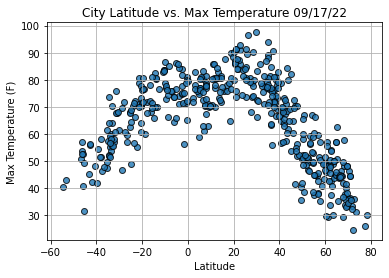

In [74]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

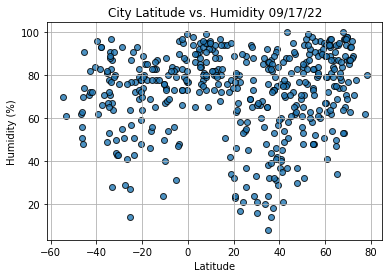

In [75]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

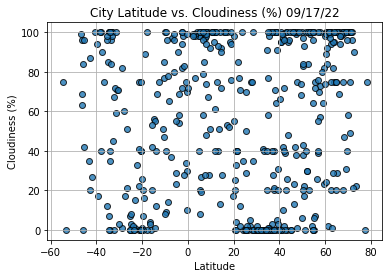

In [76]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

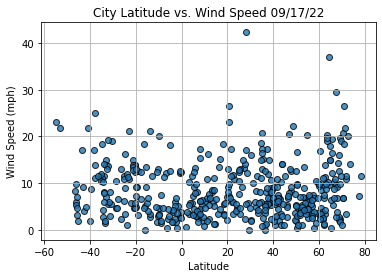

In [80]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [89]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [90]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [92]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-09-17 22:57:55
Lat                      -23.1203
Lng                     -134.9692
Max Temp                     72.3
Humidity                       77
Cloudiness                      1
Wind Speed                  21.14
Name: 13, dtype: object

In [95]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mosquera,CO,2022-09-17 22:56:37,4.7059,-74.2302,59.09,72,40,11.50
3,Dikson,RU,2022-09-17 22:57:53,73.5069,80.5464,31.12,78,22,14.05
4,Kodiak,US,2022-09-17 22:56:34,57.7900,-152.4072,56.97,60,73,0.43
7,Bathsheba,BB,2022-09-17 22:56:36,13.2167,-59.5167,83.01,83,40,8.05
8,Ngama,TD,2022-09-17 22:56:36,11.7833,17.1667,69.96,91,100,6.62


In [96]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

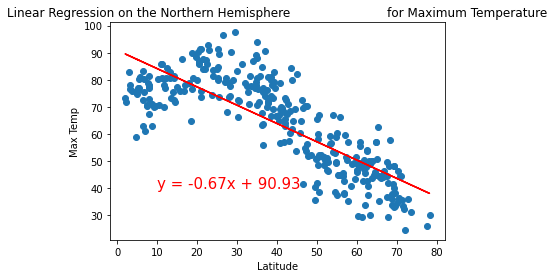

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

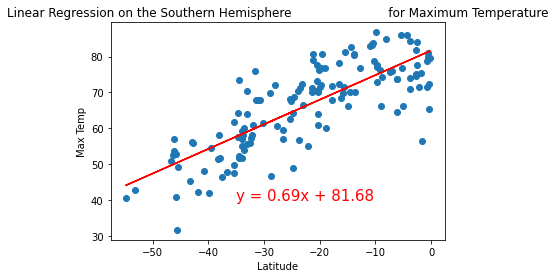

In [151]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-35,40))

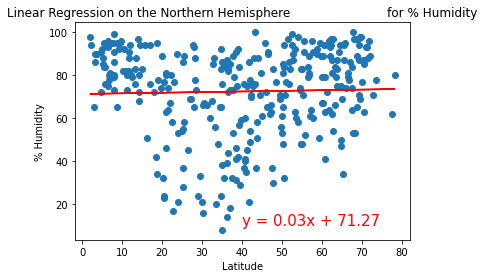

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

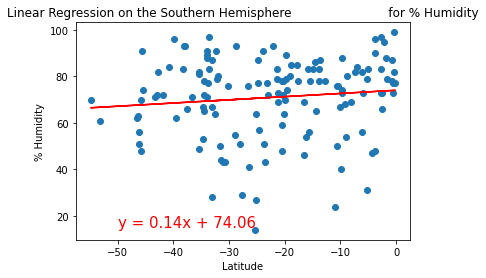

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

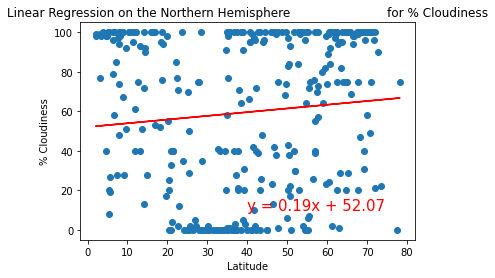

In [123]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

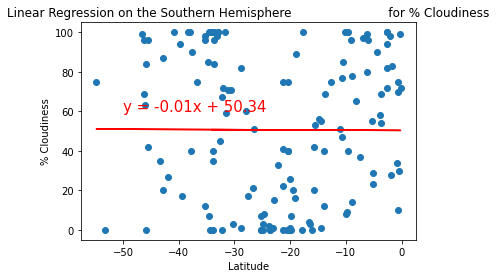

In [152]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

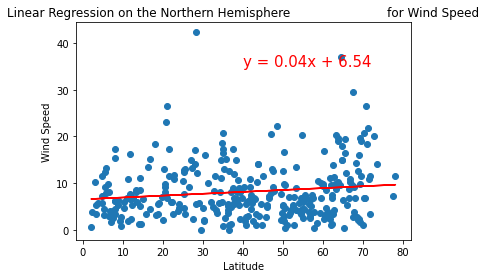

In [153]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

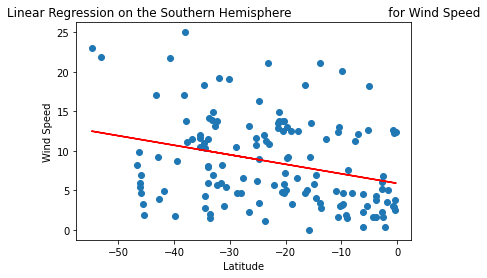

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))